In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
import matplotlib.image as mpimg 

In [2]:
# Read X_train
with open("train_test/X_train.pkl", "rb") as file:
    X_train = pickle.load(file)

# Read X_test
with open("train_test/X_test.pkl", "rb") as file:
    X_test = pickle.load(file)

# Read y_train
with open("train_test/y_train.pkl", "rb") as file:
    y_train = pickle.load(file)

# Read y_test
with open("train_test/y_test.pkl", "rb") as file:
    y_test = pickle.load(file)


In [3]:
xy = 200

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])


2023-12-10 20:20:13.684521: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model_nn = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(xy, xy, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3) 
])

In [6]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

history_nn = model_nn.fit(X_train, y_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
87/87 [==============================] - 17s 188ms/step - loss: 60.9111 - accuracy: 0.4784
Epoch 2/10
87/87 [==============================] - 16s 189ms/step - loss: 28.5047 - accuracy: 0.4745
Epoch 3/10
87/87 [==============================] - 16s 187ms/step - loss: 12.2872 - accuracy: 0.4809
Epoch 4/10
87/87 [==============================] - 16s 182ms/step - loss: 6.2486 - accuracy: 0.4619
Epoch 5/10
87/87 [==============================] - 17s 190ms/step - loss: 3.5034 - accuracy: 0.4615
Epoch 6/10
87/87 [==============================] - 17s 192ms/step - loss: 2.6432 - accuracy: 0.4486
Epoch 7/10
87/87 [==============================] - 16s 187ms/step - loss: 1.9451 - accuracy: 0.4493
Epoch 8/10
87/87 [==============================] - 16s 186ms/step - loss: 1.9589 - accuracy: 0.4554
Epoch 9/10
87/87 [==============================] - 17s 198ms/step - loss: 1.5356 - accuracy: 0.4853
Epoch 10/10
87/87 [==============================] - 17s 193ms/step - loss: 1.4818 - acc

In [8]:
test_loss_nn, test_acc_nn = model_nn.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc_nn)

22/22 - 1s - loss: 0.9746 - accuracy: 0.5661 - 713ms/epoch - 32ms/step

Test accuracy: 0.5660919547080994


In [9]:
import pickle

# Pickle the model
with open("model_nn.pkl", "wb") as file:
    pickle.dump(model_nn, file)


In [14]:
type(X_test[0])

numpy.ndarray

In [15]:
probability_model = tf.keras.Sequential([model_nn, tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

22/22 [==============================] - 1s 32ms/step


In [16]:
predictions[0]

array([0.4871578 , 0.18482597, 0.32801625], dtype=float32)

In [17]:
np.argmax(predictions[0])

0

In [18]:
y_test[0]

0

(200, 200, 3)


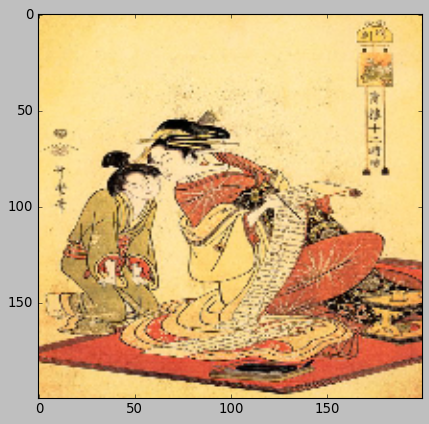

In [21]:
test_img = X_test[0]
print(test_img.shape)
plt.imshow(test_img)

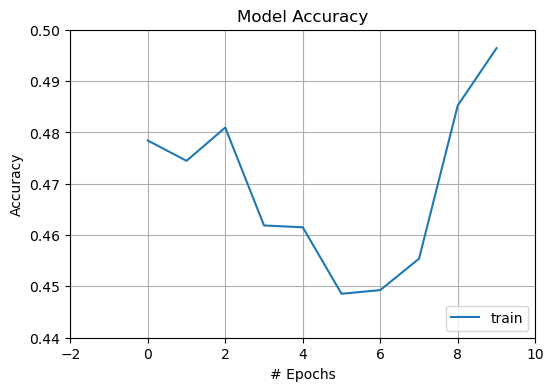

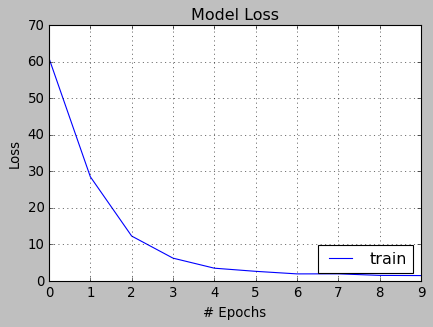

In [11]:
epoch = len(history_nn.history.get('loss',[]))

# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),history_nn.history.get('accuracy'))
#plt.plot(range(epoch),training_history.history.get('val_acc'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),history_nn.history.get('loss'))
#plt.plot(range(epoch),training_history.history.get('val_loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
plt.style.use(['classic'])